In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv').head(2000)

### Convert to more Metric System

In [3]:
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


In [4]:
df['Weight'] = round(df['Weight']/2.2)

In [5]:
df.head(3)

,Gender,Height,Weight
0,Male,73.847017,110.0
1,Male,68.781904,74.0
2,Male,74.110105,97.0


In [6]:
df['Height'] = round((df['Height']*2.54)/100,2)

In [7]:
df.head(3)

,Gender,Height,Weight
0,Male,1.88,110.0
1,Male,1.75,74.0
2,Male,1.88,97.0


### Plot the data

In [32]:
X = df[['Weight']]
y = df[['Height']]

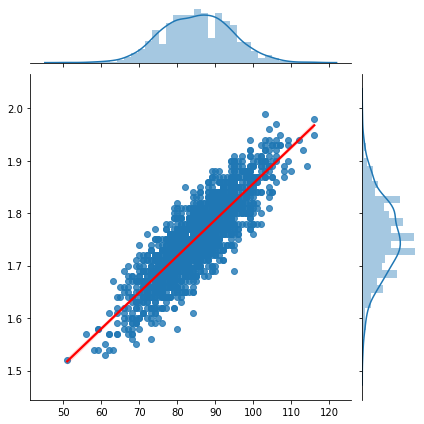

In [33]:
ax = sns.jointplot(x=X,y=y,kind='reg',joint_kws={'line_kws':{'color':'red'}})

### Training Data

Divide into Training and testing sets

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [36]:
len(X_train)

1340

In [37]:
len(X_test)

660

### Fitting the model

In [38]:
from sklearn import linear_model

In [39]:
lr = linear_model.LinearRegression()

X_train = np.asanyarray(X_train)
y_train = np.asanyarray(y_train)


lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
print('Slope : ',lr.coef_)
print('Intercept : ',lr.intercept_)

Slope :  [[0.00687299]]
Intercept :  [1.16832316]


**Plot the training Model**

Text(0, 0.5, 'Height in Meters')

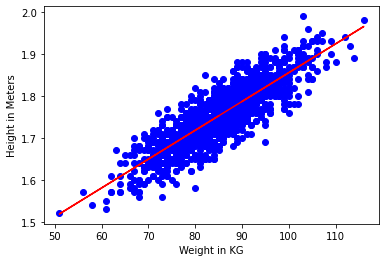

In [43]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, lr.coef_[0][0]*X_train + lr.intercept_[0], '-r')
plt.xlabel("Weight in KG")
plt.ylabel("Height in Meters")

### Testing the model : Predict

In [45]:
X_test = np.asanyarray(X_test)
y_test = np.asanyarray(y_test)

test_y_hat = lr.predict(X_test)

In [52]:
X_test[:5]

array([[73.],
       [86.],
       [84.],
       [80.],
       [83.]])

In [53]:
test_y_hat[:5]

array([[1.6700514 ],
       [1.75940026],
       [1.74565428],
       [1.71816232],
       [1.73878129]])

In [54]:
y_test[:5]

array([[1.7 ],
       [1.76],
       [1.72],
       [1.69],
       [1.75]])

**Plot the testing Model**

Line obviously following the prediction

Text(0, 0.5, 'Height in Meters')

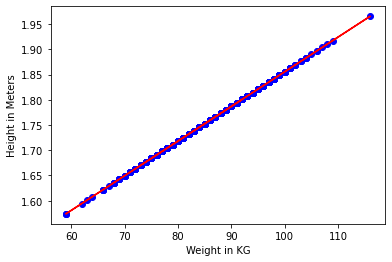

In [49]:
plt.scatter(X_test, test_y_hat,  color='blue')
plt.plot(X_test, lr.coef_[0][0]*X_test + lr.intercept_[0], '-r')
plt.xlabel("Weight in KG")
plt.ylabel("Height in Meters")

### Evaluating the Model

In [51]:
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))


Residual sum of squares (MSE): 0.00
